In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

# Read Bikeshare dataset
df_bike = pd.read_csv("Bike.csv")

# Rename the ’cnt’ column to ’cnt_rental_bike’ for clarity
df_bike.rename(columns={'cnt': 'cnt_rental_bike'}, inplace=True)

1.1)What are the first few rows of your loaded DataFrame?

In [4]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


1.2)How many rows and columns does it have?

In [5]:
df_bike.shape

(17379, 17)

1.3)What are the data types for each column?

In [6]:
df_bike.dtypes

instant              int64
dteday              object
season               int64
yr                   int64
mnth                 int64
hr                   int64
holiday              int64
weekday              int64
workingday           int64
weathersit           int64
temp               float64
atemp              float64
hum                float64
windspeed          float64
casual               int64
registered           int64
cnt_rental_bike      int64
dtype: object

2)Are there missing values in your dataset? If so, which columns are affected?

In [7]:
missing_columns = df_bike.columns[df_bike.isnull().any()].tolist()
if missing_columns:
    print("We are missing columns:", missing_columns)
else:
    print("We are not missing anything")

We are not missing anything


3)Are there duplicate rows?

In [8]:
df_bike.duplicated().any()

np.False_

4)The dataset has several columns related to date and time. Create a new column, datetime, that combines the date and time information. What is the appropriate data type for this new column?

In [ ]:
    df_bike["datetime"] = pd.to_datetime(df_bike["dteday"]) + pd.to_timedelta(df_bike["hr"], unit="h")
df_bike["datetime"]

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: datetime, Length: 17379, dtype: datetime64[ns]

5)Use the function describe() from pandas to analyze basic statistics of your data set 

In [12]:
df_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN


6.1)What is the total number of rented bikes?

In [16]:
df_bike["cnt_rental_bike"].sum()

np.int64(3292679)

6.2)What are the average,min,max of rental counts?

In [18]:
df_bike["cnt_rental_bike"].mean()

np.float64(189.46308763450142)

In [19]:
df_bike["cnt_rental_bike"].min()

np.int64(1)

In [20]:
df_bike["cnt_rental_bike"].max()

np.int64(977)

7)Visualize the distrubition of bike rentals between different seasons.

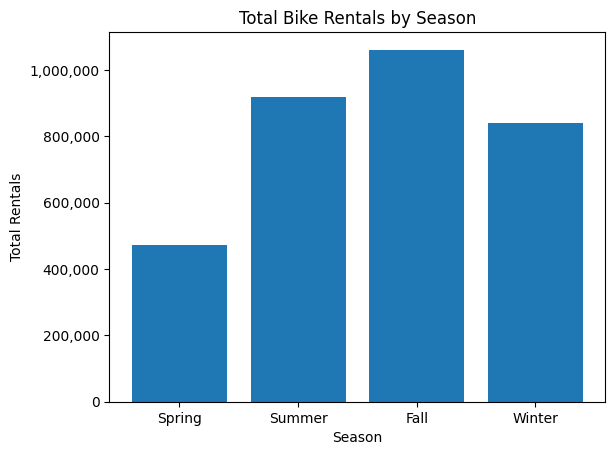

In [36]:
import matplotlib.ticker as ticker
season_sum = df_bike.groupby("season")["cnt_rental_bike"].sum()
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
plt.bar([season_labels[s] for s in season_sum.index], season_sum.values)
plt.title("Total Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()


8)Compare rents between casual users versus registered users.

In [42]:
df_bike["registered"].sum() - df_bike["casual"].sum()

np.int64(2052645)

9)What are the unique values of weathersit column? Replace them by descriptive labels:
1: ’clear’
2: ’cloudy’
3: ’light_rain’
4: ’heavy_rain’

In [50]:
df_bike["weathersit"].unique()

array(['clear', 'cloudy', 'light_rain', 'heavy_rain'], dtype=object)

In [48]:
df_bike["weathersit"] = df_bike["weathersit"].replace({
    1: "clear",
    2: "cloudy",
    3: "light_rain",
    4: "heavy_rain"
})


10)What is the data type of the weathersit column?

In [56]:
df_bike["weathersit"].dtype


dtype('O')

11)Visualize the relationship between weather conditions (weathersit) and the number of rentals. Which weather situation corresponds to the highest number of rentals on average? Does it make sense?

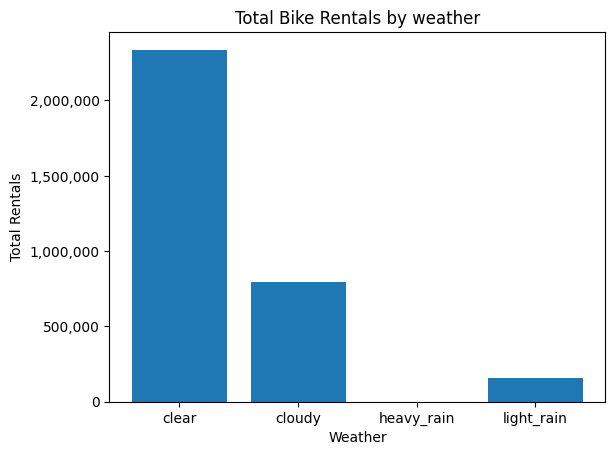

In [57]:
import matplotlib.ticker as ticker
season_sum = df_bike.groupby("weathersit")["cnt_rental_bike"].sum()
plt.bar(season_sum.index, season_sum.values)
plt.title("Total Bike Rentals by weather")
plt.xlabel("Weather")
plt.ylabel("Total Rentals")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

As we see the highest number of rentals when it's clear and the least number is heavy rain that's why it makes sense

12)Use the function OneHotEncoder from Scikitlearn to encode your column.

In [65]:
encoder = OneHotEncoder(sparse_output=False) 
encoded = encoder.fit_transform(df_bike[["weathersit"]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["weathersit"]))
df_bike_encoded = pd.concat([df_bike, encoded_df], axis=1)
df_bike_encoded.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt_rental_bike,datetime,weathersit_clear,weathersit_cloudy,weathersit_heavy_rain,weathersit_light_rain
0,1,2011-01-01,1,0,1,0,0,6,0,clear,...,0.81,0.0,3,13,16,2011-01-01 00:00:00,1.0,0.0,0.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,clear,...,0.80,0.0,8,32,40,2011-01-01 01:00:00,1.0,0.0,0.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,clear,...,0.80,0.0,5,27,32,2011-01-01 02:00:00,1.0,0.0,0.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,clear,...,0.75,0.0,3,10,13,2011-01-01 03:00:00,1.0,0.0,0.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,clear,...,0.75,0.0,0,1,1,2011-01-01 04:00:00,1.0,0.0,0.0,0.0


13)Consider the advantages and disadvantages of using one-hot encoding on a categorical variable. Does your answer depend on whether the variable is nominal (no order, like weather) or ordinal (has a natural order, like a rating scale)?

For nominal variable is fine using one hot encoding.Because there is no hierarchy between values and is very efficient to machine to read it,on the other hand if there is a lot of values we will have a really big dimension.For ordinal variables is better to use ordinal encoding because one hot encoding breakes the order.

14)What can you say about the linear dependence of the columns produced by one-hot encoding? What solution exists to avoid this problem? Change your OneHotEncoder function accordingly.

So the main problem is that result of OHE(one hot encoding) is creating linearly dependent columns.
I can fix it easily,so instead creating 4th "clear" column I will just cut it,so if row consists only zero's it means that weather is clear.

In [67]:
encoder = OneHotEncoder(drop="first", sparse_output=False)  
encoded = encoder.fit_transform(df_bike[["weathersit"]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["weathersit"]))
df_bike_encoded = pd.concat([df_bike, encoded_df], axis=1)
df_bike_encoded.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime,weathersit_cloudy,weathersit_heavy_rain,weathersit_light_rain
0,1,2011-01-01,1,0,1,0,0,6,0,clear,...,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00,0.0,0.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,clear,...,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00,0.0,0.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,clear,...,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00,0.0,0.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,clear,...,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00,0.0,0.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,clear,...,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00,0.0,0.0,0.0


15)Repeat the process of encoding using ordinal encoding for a suitable categorical column. Why can we consider that this method is more appropriate than one-hot encoding?

I will do it for the month column so we will imagine that initial data as by text,i will do it below the i will transfer data 
to the numbers by ordinal encoding.The biggest excellence of this method before OHE is that it keeps order,so there is hierarchy such that first month is January,second is Feb and etc...

In [70]:
df_bike["mnth"] = df_bike["mnth"].replace({
    1: "January",
    2:"February",
    3:"March",
    4:"Aprel",
    5:"My birthday",
    6:"Best month",
    7:"Hottest July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
})
df_bike["mnth"]

0         January
1         January
2         January
3         January
4         January
           ...   
17374    December
17375    December
17376    December
17377    December
17378    December
Name: mnth, Length: 17379, dtype: object

In [72]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded = encoder.fit_transform(df_bike[["mnth"]])
df_bike_encoded.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime,weathersit_cloudy,weathersit_heavy_rain,weathersit_light_rain
0,1,2011-01-01,1,0,1,0,0,6,0,clear,...,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00,0.0,0.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,clear,...,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00,0.0,0.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,clear,...,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00,0.0,0.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,clear,...,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00,0.0,0.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,clear,...,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00,0.0,0.0,0.0


16)Choose a numerical feature and normalize it to a range of [0, 1].

I will do it for casual column,because i dont see any other options

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_bike["casual_normalized"] = scaler.fit_transform(df_bike[["casual"]])
df_bike["casual_normalized"]

0        0.008174
1        0.021798
2        0.013624
3        0.008174
4        0.000000
           ...   
17374    0.029973
17375    0.021798
17376    0.019074
17377    0.035422
17378    0.032698
Name: casual_normalized, Length: 17379, dtype: float64

17)Standardize the same feature using standardization.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_bike["casual_standardized"] = scaler.fit_transform(df_bike[["casual"]])
df_bike["casual_standardized"]

0       -0.662755
1       -0.561343
2       -0.622190
3       -0.662755
4       -0.723603
           ...   
17374   -0.500495
17375   -0.561343
17376   -0.581625
17377   -0.459930
17378   -0.480213
Name: casual_standardized, Length: 17379, dtype: float64

18)Which features would you consider normalizing, and which would you standardize? Justify your choices based on their distributions.

So I would normalize temp,atemp,windspeed,hum,if there wouldnt be already normalized.I would do it due to the fact that range of their 
values are not so big so I can normalize between 0 and 1 to rescale values.For standartizing I would choose casual,registered and cnt_rental_bike columns because it will bring them to comparable scale.

Conceptional QUESTIONS

1)A column with values ’male’, ’female’, ’NaN’ is an example of what type of data?
(A) Ordinal
(B) Nominal
(C) Continuous
(D) Numerical
Answer is B

2)Explain the difference between nominal and ordinal data types. Provide an example for each that is not from this dataset.
Answer: Nominal is categorical data without order(for example man,woman),while ordinal data means categorical data using some order(for 
example months,season)

3)If two features are perfectly linearly dependent, it means they contain redundant information for a linear model.
(A) True
(B) False
True

4)Consider a one-hot encoded feature with N categories. If you do not drop any of the one-hot columns, what is the relationship between the sum of the values in these N columns and the number of rows?
Sum of each row is 1,because each column will be unique and there will be N such columns.

5)Why is it a common practice to drop one of the columns after one-hot encoding a feature for use in a linear regression model? What is the statistical term for this issue?
We do it beсause one hot encoding causes linear dependence so to remove it we can drop one column.Statistical for this issue is multicollinearity.

6)You have a dataset with a column representing a country’s rank in a competition (1st, 2nd, 3rd, etc.). Would you recommend using one-hot encoding or ordinal encoding for this feature? Justify your choice.
Obviously that I will use ordinal encoding.Because places has order so we need to keep order while OHE does not keep it.

7)Describe a scenario where using one-hot encoding could lead to a significant increase in the dimensionality of your dataset.
Imagine that i have category with unique names,so there are 1 million names and OHE will create 1 million new columns with name.

8)Which of the following scaling methods transforms the data to have a mean of 0 and a standard deviation of 1?
(A) Normalization (Min-Max Scaling)
(B) Standardization
(C) Log Transformation
(D) Robust scaling
Answer is B standartization

9)Normalization is generally preferred when the data contains significant outliers, as it is more robust to them than standardization.
(A) True
(B) False
False,in normalization we use minmax while its very sensitive to outliers

10)A feature has values {10, 22, 27, 53}. Calculate the normalized values for this feature using Min-Max scaling.
x1=10-10/53-10=0
x2=22-10/53-10=0.27
x3=27-10/53-10=0.39 
x4=53-10/53-10=1

11)A feature has a mean (μ) of 50 and a standard deviation (σ) of 10. A specific data point has a value of 75. Calculate its standardized value (Z-score).
Formula is Z = (x-mean)/deviation,so in our case it will be Z = 2.5

12)What is the main purpose of scaling features before training a machine learning model? Name at least two types of models that are particularly sensitive to the scale of input features.
Answer:We scale features to make them comparable in scale,so that no feature dominates others due to its magnitude.Scaling also improves convergence of gradient-based optimization.Example of models that are sensitive:Linear Regression,k-Nearest Neighbours.